# Long-lived Bug Prediction with Deep Learning

# 1. Setup environment.

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import os 
import pandas as pd
import seaborn as sns 
from scipy.stats import friedmanchisquare
from scipy.stats import kruskal

%matplotlib inline 

pd.set_option('display.max_columns', None)

eclipse_data_evaluation_path  = "../../data/processed/20200521131944-long-lived-bug-prediction-w-dnn-results.csv"
freedesktop_data_evaluation_path  = "../../data/processed/20200520013110-long-lived-bug-prediction-w-dnn-results.csv"
gcc_data_evaluation_path  = "../../data/processed/20200520202905-long-lived-bug-prediction-w-dnn-results.csv"
gnome_data_evaluation_path  = "../../data/processed/20200522123241-long-lived-bug-prediction-w-dnn-results.csv"
mozilla_data_evaluation_path  = "../../data/processed/20200523234748-long-lived-bug-prediction-w-dnn-results.csv"
winehq_data_evaluation_path  = "../../data/processed/20200525022852-long-lived-bug-prediction-w-dnn-results.csv"

print("Setup complete")

Setup complete


# 2. Load data.

In [3]:
!echo "\nHeader of metrics file $eclipse_data_evaluation_path"
!head -n 2 $eclipse_data_evaluation_path
!echo "\nNumber of lines in the file $eclipse_data_evaluation_path"
!wc -l $eclipse_data_evaluation_path

!echo "\nHeader of metrics file $freedesktop_data_evaluation_path"
!head -n 2 $freedesktop_data_evaluation_path
!echo "\nNumber of lines in the file $freedesktop_data_evaluation_path"
!wc -l $freedesktop_data_evaluation_path

!echo "\nHeader of metrics file $gcc_data_evaluation_path"
!head -n 2 $gcc_data_evaluation_path
!echo "\nNumber of lines in the file $gcc_data_evaluation_path"
!wc -l $gcc_data_evaluation_path

!echo "\nHeader of metrics file $gnome_data_evaluation_path"
!head -n 2 $gnome_data_evaluation_path
!echo "\nNumber of lines in the file $gnome_data_evaluation_path"
!wc -l $gnome_data_evaluation_path

!echo "\nHeader of metrics file $mozilla_data_evaluation_path"
!head -n 2 $mozilla_data_evaluation_path
!echo "\nNumber of lines in the file $mozilla_data_evaluation_path"
!wc -l $mozilla_data_evaluation_path

!echo "\nHeader of metrics file $winehq_data_evaluation_path"
!head -n 2 $winehq_data_evaluation_path
!echo "\nNumber of lines in the file $winehq_data_evaluation_path"
!wc -l $winehq_data_evaluation_path



\nHeader of metrics file ../../data/processed/20200521131944-long-lived-bug-prediction-w-dnn-results.csv
#,project,feature,classifier,balancing,resampling,metric,threshold,terms,train_size,train_size_class_0,train_size_class_1,val_size,val_size_class_0,val_size_class_1,test_size,test_size_class_0,test_size_class_1,loss,tp,fp,tn,fn,accuracy,precision,recall,auc,sensitivity,specificity,balanced_acc,fmeasure,epochs
0,eclipse,long_description,lstm+emb,smote,repeated_cv_5x2,val_accuracy,8,100,5880,2940,2940,1470,735,735,2444,1225,1219,0.6904810070991516,1314.0,1157.0,1287.0,1130.0,0.5321194529533386,0.5317685008049011,0.5376431941986084,0.5460109710693359,0.5376432078559739,0.526595744680851,0.5342184125495973,0.5346897115165998,200
\nNumber of lines in the file ../../data/processed/20200521131944-long-lived-bug-prediction-w-dnn-results.csv
21 ../../data/processed/20200521131944-long-lived-bug-prediction-w-dnn-results.csv
\nHeader of metrics file ../../data/processed/20200520013110-long-liv

In [4]:
# read metrics data.
eclipse_data_evaluation = pd.read_csv(eclipse_data_evaluation_path, sep=',', decimal='.')
rows_and_cols = eclipse_data_evaluation.shape
print(f"There are {rows_and_cols[0]} rows and {rows_and_cols[1]} columns in {eclipse_data_evaluation_path}.\n")

freedesktop_data_evaluation = pd.read_csv(freedesktop_data_evaluation_path, sep=',', decimal='.')
rows_and_cols = freedesktop_data_evaluation.shape
print(f"There are {rows_and_cols[0]} rows and {rows_and_cols[1]} columns in {freedesktop_data_evaluation_path}.\n")

gcc_data_evaluation = pd.read_csv(gcc_data_evaluation_path, sep=',', decimal='.')
rows_and_cols = gcc_data_evaluation.shape
print(f"There are {rows_and_cols[0]} rows and {rows_and_cols[1]} columns in {gcc_data_evaluation_path}.\n")

gnome_data_evaluation = pd.read_csv(gnome_data_evaluation_path, sep=',', decimal='.')
rows_and_cols = gnome_data_evaluation.shape
print(f"There are {rows_and_cols[0]} rows and {rows_and_cols[1]} columns in {gnome_data_evaluation_path}.\n")

mozilla_data_evaluation = pd.read_csv(mozilla_data_evaluation_path, sep=',', decimal='.')
rows_and_cols = mozilla_data_evaluation.shape
print(f"There are {rows_and_cols[0]} rows and {rows_and_cols[1]} columns in {mozilla_data_evaluation_path}.\n")

winehq_data_evaluation = pd.read_csv(winehq_data_evaluation_path, sep=',', decimal='.')
rows_and_cols = winehq_data_evaluation.shape
print(f"There are {rows_and_cols[0]} rows and {rows_and_cols[1]} columns in {winehq_data_evaluation_path}.\n")

There are 20 rows and 32 columns in ../../data/processed/20200521131944-long-lived-bug-prediction-w-dnn-results.csv.

There are 20 rows and 32 columns in ../../data/processed/20200520013110-long-lived-bug-prediction-w-dnn-results.csv.

There are 20 rows and 32 columns in ../../data/processed/20200520202905-long-lived-bug-prediction-w-dnn-results.csv.

There are 20 rows and 32 columns in ../../data/processed/20200522123241-long-lived-bug-prediction-w-dnn-results.csv.

There are 20 rows and 32 columns in ../../data/processed/20200523234748-long-lived-bug-prediction-w-dnn-results.csv.

There are 20 rows and 32 columns in ../../data/processed/20200525022852-long-lived-bug-prediction-w-dnn-results.csv.



# 3. Baseline Experiment

## Parameters

| Parameter                  |         Value        |
|----------------------------|:--------------------:|
| Project                    |        Eclipse, Freedesktop, Gcc, Gnome, Mozilla, WineHQ       |
| Algorithms                 |        lstm+emb |
| Metrics                    | Accuracy |
| Features                   | Long Description |
| Number of Terms            |        100, 150, 200, 250, 300       |
| Balancing                  |        Smote   |
| Resampling                 |        Repeated CV 5 x 2       |
| Threshold                  |                |


## 3.1 Review the data

### Best Balanced Accuracy Scores

In [5]:
eclipse_data_evaluation.sort_values('balanced_acc', ascending=False).head()

,#,project,feature,classifier,balancing,resampling,metric,threshold,terms,train_size,train_size_class_0,train_size_class_1,val_size,val_size_class_0,val_size_class_1,test_size,test_size_class_0,test_size_class_1,loss,tp,fp,tn,fn,accuracy,precision,recall,auc,sensitivity,specificity,balanced_acc,fmeasure,epochs
8,8,eclipse,long_description,lstm+emb,smote,repeated_cv_5x2,val_accuracy,8,200,5880,2940,2940,1470,735,735,2444,1225,1219,0.690387,1330.0,1142.0,1302.0,1114.0,0.538462,0.538026,0.544190,0.547478,0.544190,0.532733,0.538083,0.541090,200
16,16,eclipse,long_description,lstm+emb,smote,repeated_cv_5x2,val_accuracy,8,300,5880,2940,2940,1470,735,735,2444,1225,1219,0.694026,1317.0,1128.0,1316.0,1127.0,0.538666,0.538650,0.538871,0.546026,0.538871,0.538462,0.536639,0.538760,200
0,0,eclipse,long_description,lstm+emb,smote,repeated_cv_5x2,val_accuracy,8,100,5880,2940,2940,1470,735,735,2444,1225,1219,0.690481,1314.0,1157.0,1287.0,1130.0,0.532119,0.531769,0.537643,0.546011,0.537643,0.526596,0.534218,0.534690,200
12,12,eclipse,long_description,lstm+emb,smote,repeated_cv_5x2,val_accuracy,8,250,5880,2940,2940,1470,735,735,2444,1225,1219,0.690969,1301.0,1137.0,1307.0,1143.0,0.533552,0.533634,0.532324,0.546509,0.532324,0.534779,0.533539,0.532978,200
17,17,eclipse,long_description,lstm+emb,smote,repeated_cv_5x2,val_accuracy,63,300,8802,4401,4401,2200,1100,1100,2444,1833,611,3.066360,1026.0,1420.0,1024.0,1418.0,0.419394,0.419460,0.419804,0.325692,0.419804,0.418985,0.531642,0.419632,200


In [6]:
freedesktop_data_evaluation.sort_values('balanced_acc', ascending=False).head()

,#,project,feature,classifier,balancing,resampling,metric,threshold,terms,train_size,train_size_class_0,train_size_class_1,val_size,val_size_class_0,val_size_class_1,test_size,test_size_class_0,test_size_class_1,loss,tp,fp,tn,fn,accuracy,precision,recall,auc,sensitivity,specificity,balanced_acc,fmeasure,epochs
14,14,freedesktop,long_description,lstm+emb,smote,repeated_cv_5x2,val_accuracy,162,250,6903,3451,3452,1725,863,862,1915,1437,478,1.875083,910.0,1010.0,905.0,1005.0,0.473890,0.473958,0.475196,0.404467,0.475196,0.472585,0.540367,0.474576,200
4,4,freedesktop,long_description,lstm+emb,smote,repeated_cv_5x2,val_accuracy,28,150,4628,2314,2314,1156,578,578,1915,963,952,0.721845,1039.0,895.0,1020.0,876.0,0.537598,0.537229,0.542559,0.541634,0.542559,0.532637,0.540365,0.539880,200
10,10,freedesktop,long_description,lstm+emb,smote,repeated_cv_5x2,val_accuracy,162,200,6903,3451,3452,1725,863,862,1915,1437,478,1.459191,915.0,998.0,917.0,1000.0,0.478329,0.478306,0.477807,0.410750,0.477807,0.478851,0.535115,0.478056,200
12,12,freedesktop,long_description,lstm+emb,smote,repeated_cv_5x2,val_accuracy,28,250,4628,2314,2314,1156,578,578,1915,963,952,0.690815,1008.0,895.0,1020.0,907.0,0.529504,0.529690,0.526371,0.550635,0.526371,0.532637,0.529861,0.528025,200
0,0,freedesktop,long_description,lstm+emb,smote,repeated_cv_5x2,val_accuracy,28,100,4628,2314,2314,1156,578,578,1915,963,952,0.691995,1027.0,910.0,1005.0,888.0,0.530548,0.530201,0.536292,0.546111,0.536292,0.524804,0.529525,0.533229,200


In [7]:
gcc_data_evaluation.sort_values('balanced_acc', ascending=False).head()

,#,project,feature,classifier,balancing,resampling,metric,threshold,terms,train_size,train_size_class_0,train_size_class_1,val_size,val_size_class_0,val_size_class_1,test_size,test_size_class_0,test_size_class_1,loss,tp,fp,tn,fn,accuracy,precision,recall,auc,sensitivity,specificity,balanced_acc,fmeasure,epochs
2,2,gcc,long_description,lstm+emb,smote,repeated_cv_5x2,val_accuracy,475,100,8965,4483,4482,2241,1120,1121,2490,1867,623,2.323232,974.0,1512.0,978.0,1516.0,0.391968,0.391794,0.391165,0.338223,0.391165,0.392771,0.539728,0.391479,200
6,6,gcc,long_description,lstm+emb,smote,repeated_cv_5x2,val_accuracy,475,150,8965,4483,4482,2241,1120,1121,2490,1867,623,1.555533,1011.0,1478.0,1012.0,1479.0,0.406225,0.406187,0.406024,0.366222,0.406024,0.406426,0.533056,0.406106,200
14,14,gcc,long_description,lstm+emb,smote,repeated_cv_5x2,val_accuracy,475,250,8965,4483,4482,2241,1120,1121,2490,1867,623,2.244883,920.0,1560.0,930.0,1570.0,0.371486,0.370968,0.369478,0.323224,0.369478,0.373494,0.528741,0.370221,200
1,1,gcc,long_description,lstm+emb,smote,repeated_cv_5x2,val_accuracy,337,100,8319,4160,4159,2079,1039,1040,2489,1732,757,1.057891,1151.0,1343.0,1146.0,1338.0,0.461430,0.461508,0.462435,0.435221,0.462435,0.460426,0.528678,0.461971,200
15,15,gcc,long_description,lstm+emb,smote,repeated_cv_5x2,val_accuracy,365,250,8468,4234,4234,2116,1058,1058,2489,1763,726,1.297273,1165.0,1352.0,1137.0,1324.0,0.462435,0.462853,0.468059,0.427706,0.468059,0.456810,0.528495,0.465441,200


In [8]:
gnome_data_evaluation.sort_values('balanced_acc', ascending=False).head()

,#,project,feature,classifier,balancing,resampling,metric,threshold,terms,train_size,train_size_class_0,train_size_class_1,val_size,val_size_class_0,val_size_class_1,test_size,test_size_class_0,test_size_class_1,loss,tp,fp,tn,fn,accuracy,precision,recall,auc,sensitivity,specificity,balanced_acc,fmeasure,epochs
5,5,gnome,long_description,lstm+emb,smote,repeated_cv_5x2,val_accuracy,202,150,7468,3734,3734,1866,933,933,1985,1555,430,3.280241,826.0,1153.0,832.0,1159.0,0.417632,0.417383,0.416121,0.328105,0.416121,0.419144,0.544938,0.416751,200
9,9,gnome,long_description,lstm+emb,smote,repeated_cv_5x2,val_accuracy,202,200,7468,3734,3734,1866,933,933,1985,1555,430,3.007644,780.0,1205.0,780.0,1205.0,0.392947,0.392947,0.392947,0.299894,0.392947,0.392947,0.544201,0.392947,200
13,13,gnome,long_description,lstm+emb,smote,repeated_cv_5x2,val_accuracy,202,250,7468,3734,3734,1866,933,933,1985,1555,430,2.864656,733.0,1251.0,734.0,1252.0,0.369521,0.369456,0.369270,0.290579,0.369270,0.369773,0.541509,0.369363,200
17,17,gnome,long_description,lstm+emb,smote,repeated_cv_5x2,val_accuracy,202,300,7468,3734,3734,1866,933,933,1985,1555,430,3.733705,733.0,1255.0,730.0,1252.0,0.368514,0.368712,0.369270,0.292288,0.369270,0.367758,0.539183,0.368991,200
11,11,gnome,long_description,lstm+emb,smote,repeated_cv_5x2,val_accuracy,365,200,8156,4078,4078,2038,1019,1019,1985,1699,286,4.262142,695.0,1290.0,695.0,1290.0,0.350126,0.350126,0.350126,0.231234,0.350126,0.350126,0.538943,0.350126,200


In [5]:
mozilla_data_evaluation.sort_values('balanced_acc', ascending=False).head()

,#,project,feature,classifier,balancing,resampling,metric,threshold,terms,train_size,train_size_class_0,train_size_class_1,val_size,val_size_class_0,val_size_class_1,test_size,test_size_class_0,test_size_class_1,loss,tp,fp,tn,fn,accuracy,precision,recall,auc,sensitivity,specificity,balanced_acc,fmeasure,epochs
0,0,mozilla,long_description,lstm+emb,smote,repeated_cv_5x2,val_accuracy,24,100,5888,2944,2944,1472,736,736,2445,1226,1219,0.690016,1410.0,1065.0,1380.0,1035.0,0.570552,0.569697,0.576687,0.578561,0.576687,0.564417,0.571456,0.573171,200
4,4,mozilla,long_description,lstm+emb,smote,repeated_cv_5x2,val_accuracy,24,150,5888,2944,2944,1472,736,736,2445,1226,1219,0.698451,1362.0,1093.0,1352.0,1083.0,0.555010,0.554786,0.557055,0.563570,0.557055,0.552965,0.551803,0.555918,200
16,16,mozilla,long_description,lstm+emb,smote,repeated_cv_5x2,val_accuracy,24,300,5888,2944,2944,1472,736,736,2445,1226,1219,0.697446,1350.0,1094.0,1351.0,1095.0,0.552352,0.552373,0.552147,0.565205,0.552147,0.552556,0.549818,0.552260,200
14,14,mozilla,long_description,lstm+emb,smote,repeated_cv_5x2,val_accuracy,188,250,8802,4401,4401,2200,1100,1100,2445,1833,612,1.915614,1136.0,1310.0,1135.0,1309.0,0.464417,0.464432,0.464622,0.402912,0.464622,0.464213,0.546884,0.464527,200
15,15,mozilla,long_description,lstm+emb,smote,repeated_cv_5x2,val_accuracy,365,250,9610,4805,4805,2402,1201,1201,2446,2002,444,2.234205,1018.0,1429.0,1017.0,1428.0,0.415985,0.416020,0.416190,0.335992,0.416190,0.415781,0.546451,0.416105,200


In [10]:
winehq_data_evaluation.sort_values('balanced_acc', ascending=False).head()

,#,project,feature,classifier,balancing,resampling,metric,threshold,terms,train_size,train_size_class_0,train_size_class_1,val_size,val_size_class_0,val_size_class_1,test_size,test_size_class_0,test_size_class_1,loss,tp,fp,tn,fn,accuracy,precision,recall,auc,sensitivity,specificity,balanced_acc,fmeasure,epochs
5,5,winehq,long_description,lstm+emb,smote,repeated_cv_5x2,val_accuracy,491,150,4800,2400,2400,1200,600,600,1514,999,515,0.966133,758.0,763.0,751.0,756.0,0.498349,0.498356,0.500660,0.470620,0.500661,0.496037,0.537895,0.499506,200
1,1,winehq,long_description,lstm+emb,smote,repeated_cv_5x2,val_accuracy,491,100,4800,2400,2400,1200,600,600,1514,999,515,1.161790,705.0,810.0,704.0,809.0,0.465324,0.465347,0.465654,0.431812,0.465654,0.464993,0.525130,0.465500,200
18,18,winehq,long_description,lstm+emb,smote,repeated_cv_5x2,val_accuracy,798,300,5688,2844,2844,1422,711,711,1514,1184,330,2.027029,634.0,864.0,650.0,880.0,0.424042,0.423231,0.418758,0.352940,0.418758,0.429326,0.525005,0.420983,200
13,13,winehq,long_description,lstm+emb,smote,repeated_cv_5x2,val_accuracy,491,250,4800,2400,2400,1200,600,600,1514,999,515,1.423369,683.0,836.0,678.0,831.0,0.449472,0.449638,0.451123,0.422581,0.451123,0.447820,0.524317,0.450379,200
10,10,winehq,long_description,lstm+emb,smote,repeated_cv_5x2,val_accuracy,798,200,5688,2844,2844,1422,711,711,1514,1184,330,1.995326,615.0,911.0,603.0,899.0,0.402246,0.403014,0.406209,0.328406,0.406209,0.398283,0.523935,0.404605,200


In [12]:
data_frames = [eclipse_data_evaluation, freedesktop_data_evaluation, gcc_data_evaluation,
                   gnome_data_evaluation, mozilla_data_evaluation, winehq_data_evaluation]

all_data_evaluation = pd.concat(data_frames)

## 3.2 Evaluation Metrics

### Balanced Accuracy
Accurácia balanceada: (sensitivity + specificity)/2

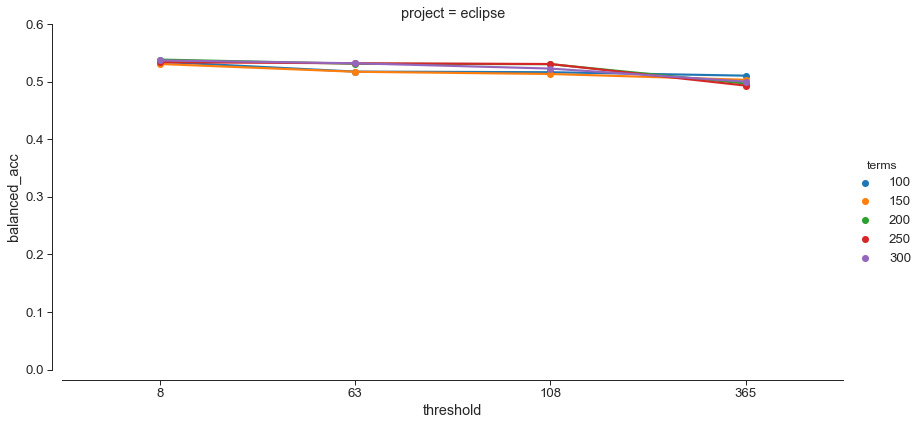

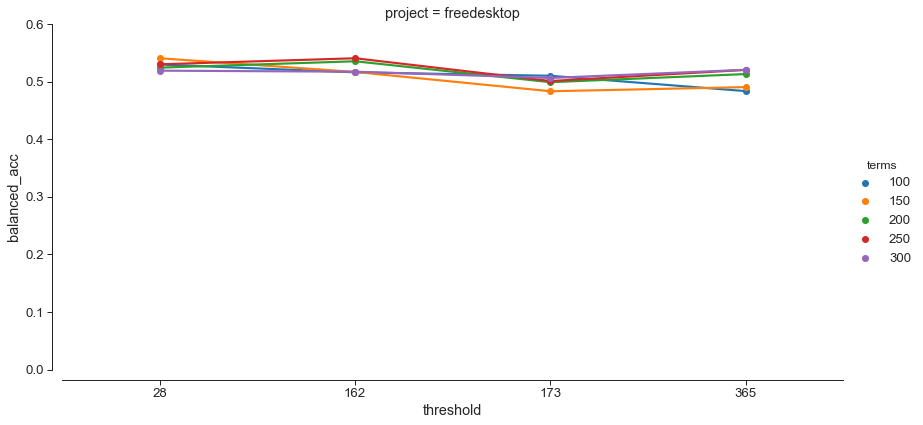

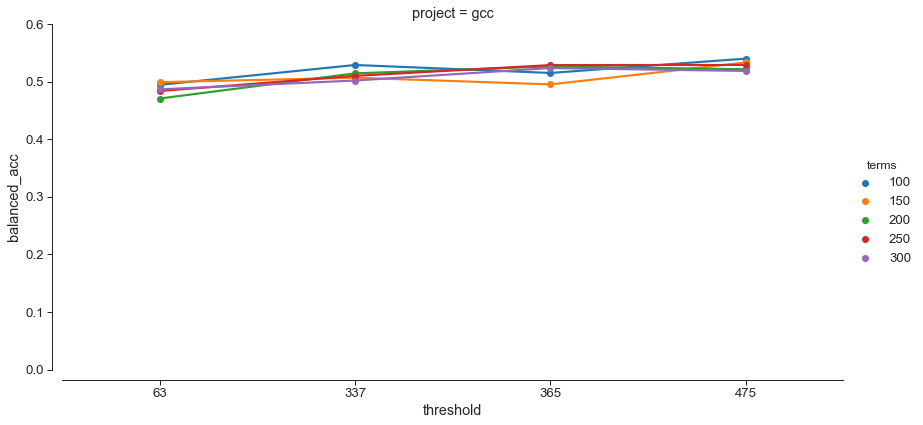

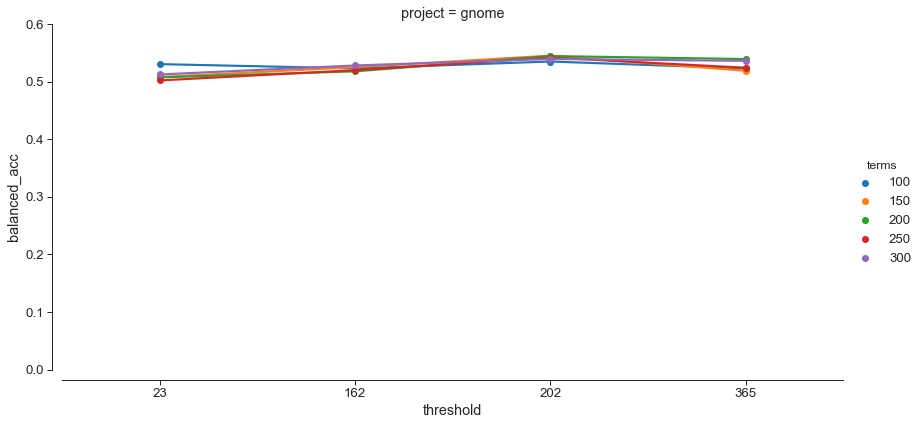

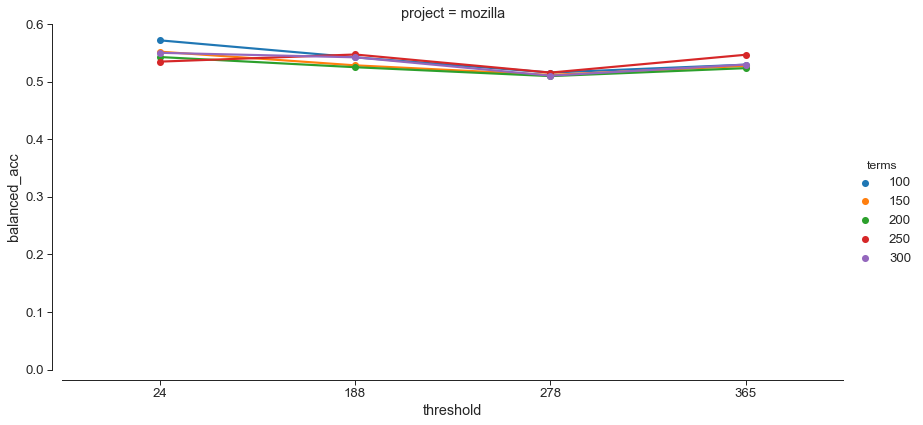

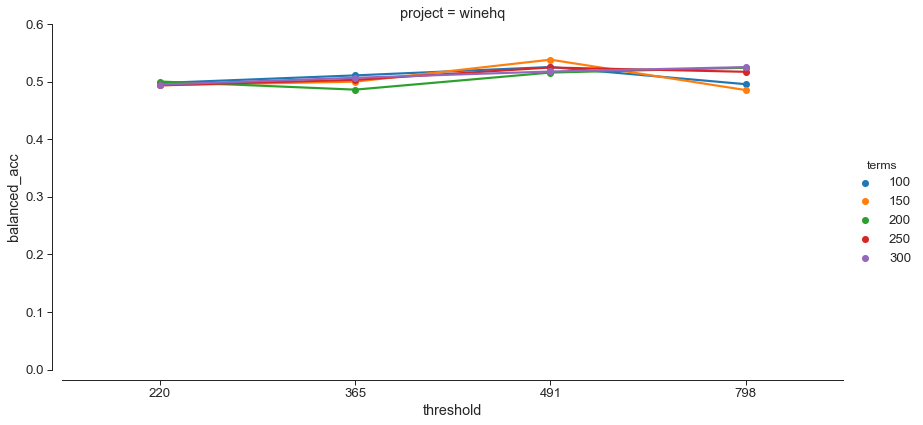

In [5]:
sns.set_context('paper', font_scale = 1.5)
sns.set_style("ticks", {'axes.grid' : False})

eclipse_data_evaluation.threshold = eclipse_data_evaluation['threshold'].astype(str)
eclipse_data_evaluation.terms = eclipse_data_evaluation['terms'].astype(str)
g1 = sns.catplot(data=eclipse_data_evaluation, x="threshold", y="balanced_acc"
                , hue="terms", kind="point", height=6
                , aspect=2, order=['8', '63', '108', '365']
                , col="project")
g1.set(ylim=(0, 0.6))
sns.despine(offset=10)

freedesktop_data_evaluation.threshold = freedesktop_data_evaluation['threshold'].astype(str)
freedesktop_data_evaluation.terms = freedesktop_data_evaluation['terms'].astype(str)
g2 = sns.catplot(data=freedesktop_data_evaluation, x="threshold", y="balanced_acc"
                , hue="terms", kind="point", height=6
                , aspect=2, order=['28', '162', '173', '365']
                , col="project")
g2.set(ylim=(0, 0.6))
sns.despine(offset=10)

gcc_data_evaluation.threshold = gcc_data_evaluation['threshold'].astype(str)
gcc_data_evaluation.terms = gcc_data_evaluation['terms'].astype(str)
g3 = sns.catplot(data=gcc_data_evaluation, x="threshold", y="balanced_acc"
                , hue="terms", kind="point", height=6
                , aspect=2, order=['63', '337', '365', '475']
                , col="project")
g3.set(ylim=(0, 0.6))
sns.despine(offset=10)

gnome_data_evaluation.threshold = gnome_data_evaluation['threshold'].astype(str)
gnome_data_evaluation.terms = gnome_data_evaluation['terms'].astype(str)
g4 = sns.catplot(data=gnome_data_evaluation, x="threshold", y="balanced_acc"
                , hue="terms", kind="point", height=6
                , aspect=2, order=['23', '162', '202', '365']
                , col="project")
g4.set(ylim=(0, 0.6))
sns.despine(offset=10)

mozilla_data_evaluation.threshold = mozilla_data_evaluation['threshold'].astype(str)
mozilla_data_evaluation.terms = mozilla_data_evaluation['terms'].astype(str)
g5 = sns.catplot(data=mozilla_data_evaluation, x="threshold", y="balanced_acc"
                , hue="terms", kind="point", height=6
                , aspect=2, order=['24', '188', '278', '365']
                , col="project")
g5.set(ylim=(0, 0.6))
sns.despine(offset=10)

winehq_data_evaluation.threshold = winehq_data_evaluation['threshold'].astype(str)
winehq_data_evaluation.terms = winehq_data_evaluation['terms'].astype(str)
g6 = sns.catplot(data=winehq_data_evaluation, x="threshold", y="balanced_acc"
                , hue="terms", kind="point", height=6
                , aspect=2, order=['220', '365', '491', '798']
                , col="project")
g6.set(ylim=(0, 0.6))

sns.despine(offset=10)